In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'photo_data/train'
valid_path = 'photo_data/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('photo_data/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

#Making a model
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [9]:
# Model csot and optmization methods
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Photo_data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1359 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Photo_data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 4 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
43/43 [==============================] - 243s 5s/step - loss: 3.7851 - accuracy: 0.3525 - val_loss: 1.2520 - val_accuracy: 0.6333
Epoch 2/30
43/43 [==============================] - 208s 5s/step - loss: 1.0983 - accuracy: 0.5489 - val_loss: 0.9816 - val_accuracy: 0.6083
Epoch 3/30
43/43 [==============================] - 215s 5s/step - loss: 0.9499 - accuracy: 0.6336 - val_loss: 0.7312 - val_accuracy: 0.7417
Epoch 4/30
43/43 [==============================] - 223s 5s/step - loss: 0.8540 - accuracy: 0.6645 - val_loss: 0.7279 - val_accuracy: 0.7000
Epoch 5/30
43/43 [==============================] - 218s 5s/step - loss: 0.8638 - accuracy: 0.6468 - val_loss: 0.7842 - val_accuracy: 0.7333
Epoch 6/30
43/43 [==============================] - 229s 5s/step - loss: 0.8697 - accuracy: 0.6755 - val_loss: 0.7238 - val_accuracy: 0.7083
Epoch 7/30
43/43 [==============================] - 213s 5s/step - loss: 0.7513 - accuracy: 0.7270 - val_loss: 0.6755 - val_accuracy: 0.7917
Epoch 8/30
43

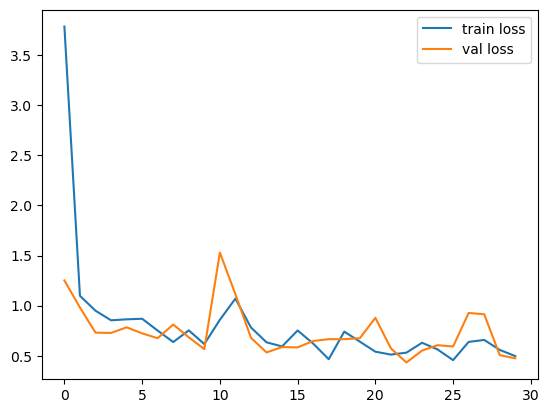

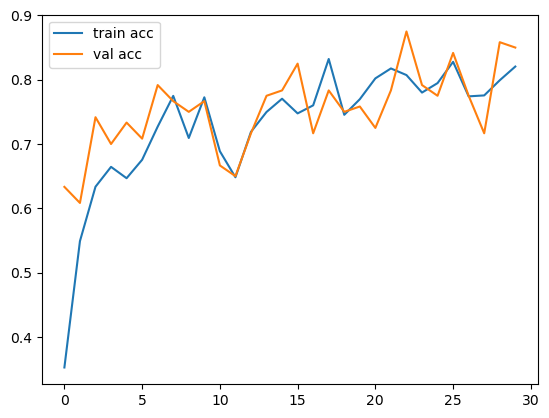

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as h5 file

from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [16]:
y_pred = model.predict(test_set)

4/4 [==============================] - 31s 7s/step


In [17]:
y_pred

array([[7.66614623e-15, 2.29914265e-09, 4.89814149e-04, 9.99510169e-01],
       [2.60459095e-01, 7.69362226e-02, 6.17268801e-01, 4.53358255e-02],
       [1.64341316e-06, 7.83032924e-03, 1.52269294e-02, 9.76941049e-01],
       [9.69065368e-01, 1.09515721e-02, 9.51985945e-04, 1.90309696e-02],
       [3.73657495e-01, 5.12481071e-02, 5.46691298e-01, 2.84030996e-02],
       [2.97576480e-06, 9.98359501e-01, 2.01668954e-04, 1.43583503e-03],
       [2.35188108e-05, 9.92954433e-01, 9.89548353e-05, 6.92307949e-03],
       [4.58325985e-06, 9.98780310e-01, 1.09547516e-03, 1.19636643e-04],
       [6.33324444e-01, 1.47332489e-01, 1.48665428e-01, 7.06777498e-02],
       [3.11160897e-04, 1.40037030e-01, 6.09702710e-03, 8.53554726e-01],
       [3.13932747e-02, 5.32247759e-02, 1.39817044e-01, 7.75564849e-01],
       [1.29837776e-04, 9.95546460e-01, 3.03864339e-03, 1.28499581e-03],
       [1.10966042e-02, 3.11929844e-02, 9.41022217e-01, 1.66881550e-02],
       [9.11720216e-01, 3.16032916e-02, 5.11523075e

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([3, 2, 3, 0, 2, 1, 1, 1, 0, 3, 3, 1, 2, 0, 3, 3, 2, 0, 1, 2, 0, 1,
       1, 3, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 3, 1, 3, 0, 3, 3, 3, 0,
       3, 3, 1, 2, 3, 0, 3, 3, 3, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 3, 1,
       3, 2, 0, 2, 0, 0, 2, 3, 1, 0, 1, 2, 2, 1, 2, 2, 3, 1, 3, 1, 3, 0,
       3, 0, 2, 3, 3, 1, 1, 0, 3, 3, 0, 2, 3, 1, 0, 0, 1, 3, 0, 1, 1, 2,
       0, 0, 3, 2, 2, 3, 1, 1, 1, 0], dtype=int64)

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
model = load_model('model_resnet50.h5')

In [42]:
img_data

array([[[[-103.13508 , -116.343704, -123.295685],
         [-103.11939 , -116.33586 , -123.28784 ],
         [-103.11939 , -116.33586 , -123.28784 ],
         ...,
         [-103.24097 , -116.32802 , -122.985886],
         [-103.24489 , -116.33194 , -122.98981 ],
         [-103.24489 , -116.33194 , -122.98981 ]],

        [[-103.14292 , -116.35155 , -123.30353 ],
         [-103.139   , -116.347626, -123.29961 ],
         [-103.13116 , -116.347626, -123.29961 ],
         ...,
         [-103.23312 , -116.320175, -122.97804 ],
         [-103.237045, -116.3241  , -122.981964],
         [-103.24097 , -116.32802 , -122.985886]],

        [[-103.16253 , -116.36331 , -123.30745 ],
         [-103.14684 , -116.35939 , -123.29961 ],
         [-103.14292 , -116.35547 , -123.295685],
         ...,
         [-103.22528 , -116.30057 , -122.96236 ],
         [-103.23312 , -116.30841 , -122.9702  ],
         [-103.24489 , -116.320175, -122.981964]],

        ...,

        [[-102.939   , -115.779   , -1

In [37]:
from tensorflow.keras.preprocessing import image

img = image.load_img('Photo_data/Test/Pink Sky/pastel-color-pink-purple-sky-260nw-310237601.jpg', target_size=(224, 224))


In [38]:
x = image.img_to_array(img)
x

array([[[ 98., 111., 205.],
        [100., 113., 209.],
        [100., 113., 209.],
        ...,
        [177., 115., 178.],
        [176., 114., 177.],
        [176., 114., 177.]],

       [[ 96., 109., 203.],
        [ 97., 110., 204.],
        [ 97., 110., 206.],
        ...,
        [179., 117., 180.],
        [178., 116., 179.],
        [177., 115., 178.]],

       [[ 95., 106., 198.],
        [ 97., 107., 202.],
        [ 98., 108., 203.],
        ...,
        [183., 122., 182.],
        [181., 120., 180.],
        [178., 117., 177.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [39]:
x.shape

(224, 224, 3)

In [40]:
x=x/255

In [41]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

1/1 [==============================] - 7s 7s/step


array([[8.8395896e-24, 2.7832217e-15, 4.9025656e-10, 1.0000000e+00]],
      dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 226ms/step


In [45]:
a==1

array([False])